In [1]:
## Exercise - Landau Section 9.3.2 #1: Sample analytic input
## Exercise - Landau Section 9.3.2 #4: Sample analytic input
## Exercise – Landau Section 9.3.2: Highly nonlinear oscillator
## (Grad Students) Exercise - Landau Section 9.4.2 #1: Autocorrelation Function
#- The text recommends several codes to modify to compute this problem

# Lecture 17: Chapter 9 Fourier Analysis, Part 1

## Exercise – Landau Section 9.1.2 #1: Fourier Series Summation (Sawtooth function)
- FourierMatplot.py is at
[this website](https://sites.science.oregonstate.edu/~landaur/Books/Codes/PythonCodes/)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 9.1.2 Exercises: Fourier Series Summations

**Hint:** The program **FourierMatplot.py** written by Oscar Estrepe performs a Fourier analysis of a sawtooth function and produces the visualization shown on the right of Figure 9.1.  
You may want to use this program to help with this exercise.

### 1) Sawtooth function:  
Sum the Fourier series for the sawtooth function up to order $ N = 2, 4, 10, 20 $, and plot the results over two periods.

- **(a)** Check that in each case the series gives the mean value of the function at the points of discontinuity.  
- **(b)** Check that in each case the series overshoots by about 9% the value of the function on either side of the discontinuity (the Gibbs phenomenon).


The sawtooth function (Figure9.1 left) is described mathematically as

$$y(t) = \Biggl\{\begin{array}{cl}
            \frac{t}{T∕2}, for \space 0≤ t≤ \frac{T}{2}, \\
            \frac{t−T}{T∕2}, for \space \frac{T}{2} ≤ t≤ T. 
            \end{array}
            \tag{9.10}$$

 <span style="color: green;"> So first let's define the sawtooth function, when I wrote it as in the book eq and plotted it
I found it wasn't periodical, but stopped at T. So I decided to keep every t inside T. </span>

In [3]:
def Sawtooth(t,T):
    t = t % T  # to ensure periodicity

    if t < T/2 and t > 0:
        return t/(T/2)
    elif t < T and t > T/2:
        return (t-T)/(T/2)
    return 0

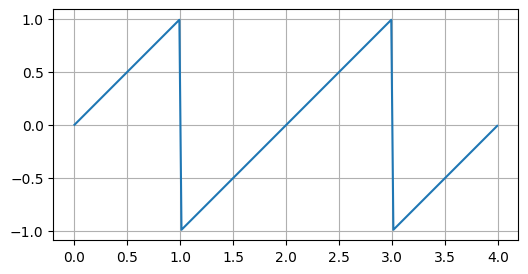

In [4]:
#plot the function
T = 2.                                                    # Period 
t = np.arange(0.0, 2*T, 0.01)
y = []
for i in t:
    y.append(Sawtooth(i,T))

plt.figure(figsize=(6, 3))
plt.plot(t,y)
plt.grid()
plt.show()


 <span style="color: green;"> Now we need to find the fourier series
 the book uses </span>
 $$
b_n = \frac{2}{T} \int_{-T/2}^{+T/2} \frac{t}{T/2} \sin(n\omega t) \, dt = \frac{2}{n\pi} (-1)^{n+1} \tag{9.12}
$$

$$
y(t) = \sum_{n=1}^{N} \frac{2}{n\pi} (-1)^{n+1} \sin(n\omega t)
$$

where $ \omega = \frac{2\pi}{T} $.



In [5]:
def FourST(N, T, t):
    """ Computes the Fourier series for a sawtooth wave using the book's formula """
    sumy = np.zeros_like(t)  # Initialize sum
    omega = 2.0 * np.pi / T  # Fundamental frequency

    n_values = np.arange(1, N + 1)  
    b_n_values = (2 / (n_values * np.pi)) * (-1) ** (n_values + 1)  # coefficients

    # Sum the Fourier series
    for n, bn in zip(n_values, b_n_values):
        sumy += bn * np.sin(n * omega * t)

    return sumy, n_values, b_n_values

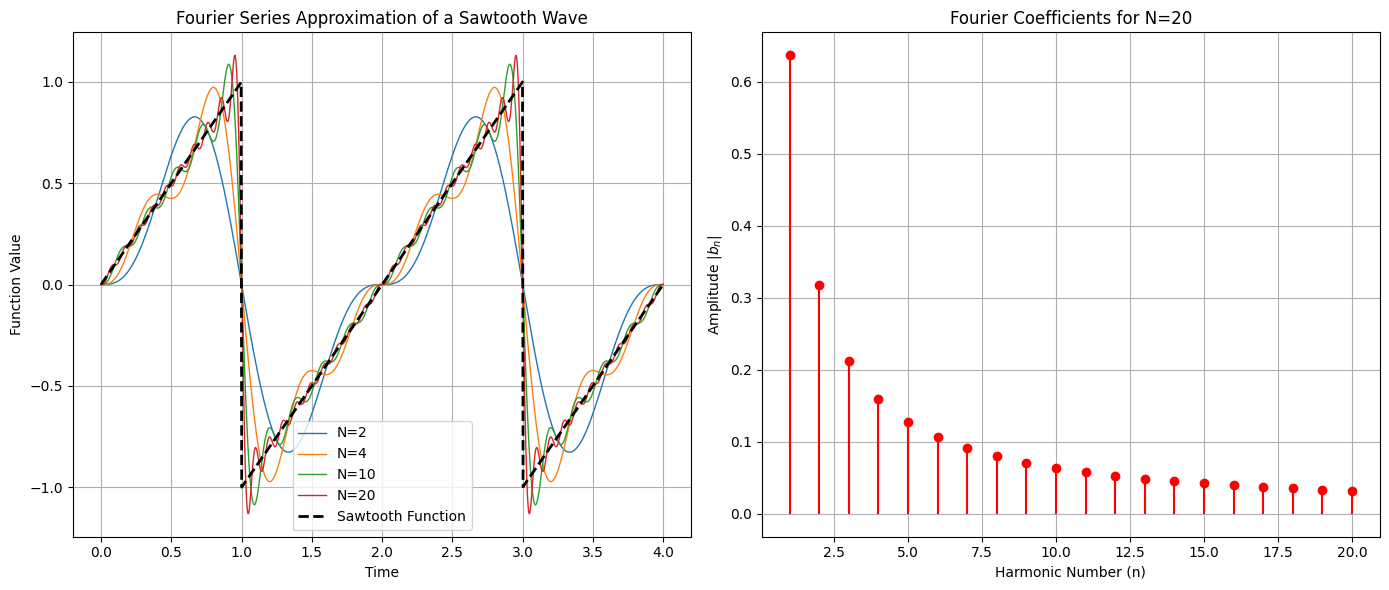

In [6]:

# Define the time range and period
T = 2.0  # Period
t = np.linspace(0, 2*T, 1000) 

# Compute sawtooth function
sawtooth_values = [Sawtooth(i, T) for i in t]

# Define different N values for Fourier approximations
N_values = [2, 4, 10, 20]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ------------------ (1) Fourier Series Approximation ------------------
for N in N_values:
    fourier_values, _, _ = FourST(N, T, t)  # Get Fourier series values
    axes[0].plot(t, fourier_values, label=f'N={N}', linewidth=1)

# Plot sawtooth function
axes[0].plot(t, sawtooth_values, 'k--', label="Sawtooth Function", linewidth=2)
axes[0].set_title("Fourier Series Approximation of a Sawtooth Wave")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Function Value")
axes[0].legend()
axes[0].grid()

# ------------------ (2) Fourier Frequencies ------------------
N_max = max(N_values)
_, n_values, b_n_values = FourST(N_max, T, t) 
axes[1].stem(n_values, np.abs(b_n_values), basefmt=" ", linefmt="r-", markerfmt="ro")

axes[1].set_title(f"Fourier Coefficients for N={N_max}")
axes[1].set_xlabel("Harmonic Number (n)")
axes[1].set_ylabel(r"Amplitude $|b_n|$")
axes[1].grid()

plt.tight_layout()
plt.show()


<span style="color: green;"> **a)** From the graph, we can tell that the discontinuity happens at 1 and 3, which correspond to $T/2$ and $3T/2$.  
The mean of the function is 0. First, I want to see what the evaluated function gives. Then, I will approach the discontinuity from the left and the right as in:

$$
f_{\text{Fourier}}(t_0) = \frac{1}{2} \left[ \lim_{t \to t_0^-} f(t) + \lim_{t \to t_0^+} f(t) \right]
$$

</span>


In [7]:
np.mean(sawtooth_values)

np.float64(-1.4210854715202004e-17)

In [8]:
T = 2.0  # Period
N_values = [2, 4, 10, 20]   # Order of Fourier series

# Compute the Fourier series at the discontinuity t = T/2
t_discontinuity = T / 2

for N in N_values:
    fourier_value = FourST(N, T, np.array([t_discontinuity]))

# Compute expected mean value (should be 0)
left_limit = Sawtooth(t_discontinuity - 1e-6, T)
right_limit = Sawtooth(t_discontinuity + 1e-6, T)
mean_value = (left_limit + right_limit) / 2

print(f"Expected mean value: {mean_value:.6e}")

for N in N_values:
    fourier_value = FourST(N, T, np.array([t_discontinuity]))[0][0]
    print(f"N={N}: Fourier series value at discontinuity = {fourier_value:.6e}")



Expected mean value: -5.551115e-17
N=2: Fourier series value at discontinuity = 1.559269e-16
N=4: Fourier series value at discontinuity = 3.118537e-16
N=10: Fourier series value at discontinuity = 7.796344e-16
N=20: Fourier series value at discontinuity = 1.727679e-15


<span style="color: green;"> The values get further from 0 as N grows, but they are practically 0. I wonder if this is a float precision thing. </span>

In [9]:
t_near_discontinuity = np.linspace(t_discontinuity - 0.2, t_discontinuity + 0.2, 500)

expected_overshoot = 1.09
print(f"overshoot: {expected_overshoot:.6f}\n")

# Check Gibbs phenomenon for each N
for N in N_values:
    fourier_near, _, _  = FourST(N, T, t_near_discontinuity)

    max_value_near_discontinuity = np.max(fourier_near)

    print(f"N={N}: Maximum Fourier series value near discontinuity = {max_value_near_discontinuity:.6f}")

    # Check if it approximately matches the expected Gibbs overshoot
    overshoot_percentage = ((max_value_near_discontinuity - 1) / 1) * 100
    print(f"Overshoot percentage: {overshoot_percentage:.2f}%")

overshoot: 1.090000

N=2: Maximum Fourier series value near discontinuity = 0.676926
Overshoot percentage: -32.31%
N=4: Maximum Fourier series value near discontinuity = 0.972296
Overshoot percentage: -2.77%
N=10: Maximum Fourier series value near discontinuity = 1.086692
Overshoot percentage: 8.67%
N=20: Maximum Fourier series value near discontinuity = 1.130980
Overshoot percentage: 13.10%


## Exercise - Landau Section 9.1.2 #2: Fourier Series Summation (Half-wave function)


2) Half-wave function: Sum the Fourier series for the half-wave function up to order
N = 2, 4, 10, 20, and plot the results over two periods. (The series converges quite well,
doesn’t it?)

In [10]:
def Halfwave(t, omega): #ω = 2π/T
    T = 2*np.pi/omega
    t = t % T  # to ensure periodicity
    if t > 0 and t < T/2:
        return np.sin(omega*t)
    else:
        return 0

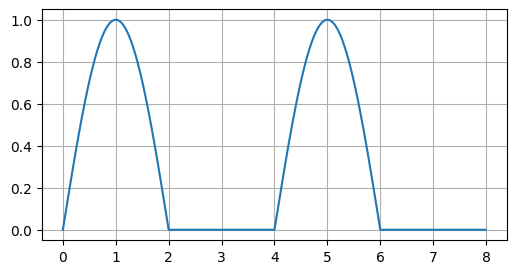

In [11]:
omega = 0.5 * np.pi      
T = 2*np.pi/omega
t = np.arange(0.0, 2*T, 0.01)
y = []
for i in t:
    y.append(Halfwave(i,omega))

plt.figure(figsize=(6, 3))
plt.plot(t,y)
plt.grid()
plt.show()

In [12]:
def FourHW(N, omega, t):
    """ Computes the Fourier series for a half-wave wave using the book's formula """
    sumy = np.zeros_like(t)  # Initialize sum

    n_values = np.arange(2, N + 1)  
    # coefficients
    a_n_values = -2 / (np.pi * (n_values**2 - 1))
    
    # Sum the Fourier series
    for n, an in zip(n_values, a_n_values):
        if n % 2 == 0:
            sumy += an * np.cos(n * omega * t) # Even 
        else:
            sumy += 0 # Odd
        
    sumy += 0.5 * np.sin(omega * t)
    return sumy, n_values, a_n_values

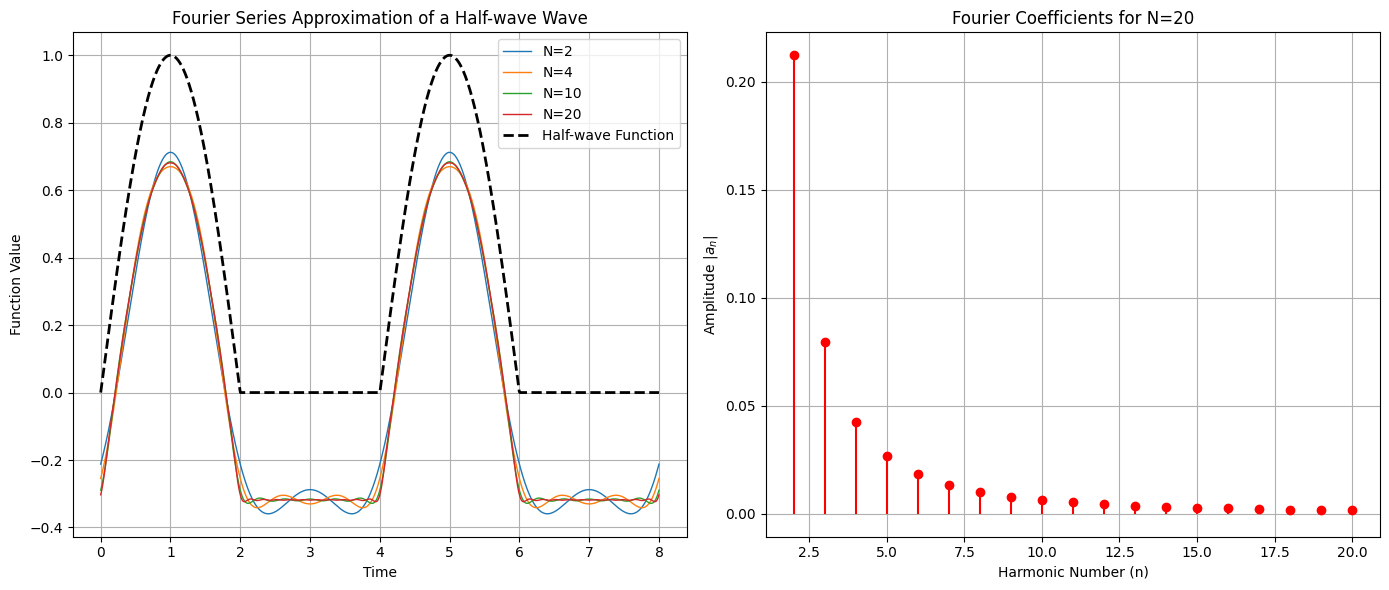

In [13]:

# Define the time range and period
omega = 0.5 * np.pi      
T = 2*np.pi/omega
t = np.linspace(0, 2*T, 1000) 

# Compute sawtooth function
halfwave_values = [Halfwave(i,omega) for i in t]

# Define different N values for Fourier approximations
N_values = [2, 4, 10, 20]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ------------------ (1) Fourier Series Approximation ------------------
for N in N_values:
    fourier_values, _, _ = FourHW(N, omega, t)  # Get Fourier series values
    axes[0].plot(t, fourier_values, label=f'N={N}', linewidth=1)

# Plot sawtooth function
axes[0].plot(t, halfwave_values, 'k--', label="Half-wave Function", linewidth=2)
axes[0].set_title("Fourier Series Approximation of a Half-wave Wave")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Function Value")
axes[0].legend()
axes[0].grid()

# ------------------ (2) Fourier Frequencies ------------------
N_max = max(N_values)
_, n_values, a_n_values = FourHW(N_max, omega, t) 
axes[1].stem(n_values, np.abs(a_n_values), basefmt=" ", linefmt="r-", markerfmt="ro")

axes[1].set_title(f"Fourier Coefficients for N={N_max}")
axes[1].set_xlabel("Harmonic Number (n)")
axes[1].set_ylabel(r"Amplitude $|a_n|$")
axes[1].grid()

plt.tight_layout()
plt.show()


## Exercise – Landau Section 9.3.1 #1: Aliasing
- `DFTcomplex.py` code from Code Listing 9.1 can be found on VPython code
website in Getting Started module.

1) The sampling of a signal by DFT for only a finite number of times not only limits  
the accuracy of the deduced high-frequency components, but also contaminates the  
deduced low-frequency components (aliasing). Consider the two functions sin(𝜋t∕2) and  
sin(2𝜋t) for 0 ≤ t ≤ 8.

    (a) Make graphs of both functions on the same plot.  
    (b) Perform a DFT on both functions.  
    (c) Sample at times t = 0, 2, 4, 6, 8,… and draw conclusions.  
    (d) Sample at times t = 0, 12∕10, 4∕3,… and draw conclusions about the high-frequency  
        components (Hint: They may be aliased by the low-frequency components).  
    (e) The Nyquist criterion states that when a signal containing frequency f is sampled at  
        rate s = N∕T, measurements per unit time, with s ≤ f∕2, then aliasing occurs.  
        Verify specifically that the frequencies f and f − 2s yield the same DFT.

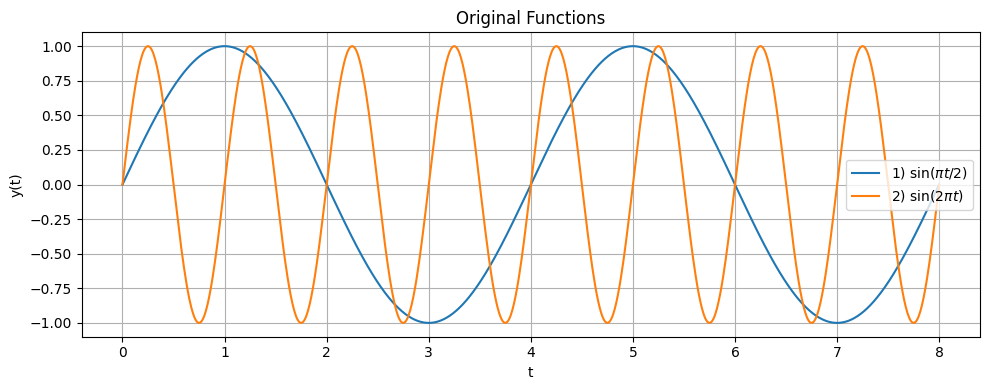

In [14]:
t = np.linspace(0, 8, 1000)
y1 = np.sin(np.pi * t / 2)
y2 = np.sin(2 * np.pi * t)

plt.figure(figsize=(10, 4))
plt.plot(t, y1, label=r'1) sin($\pi t / 2$)')
plt.plot(t, y2, label=r'2) sin($2\pi t$)')
plt.title("Original Functions")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Constants and array declarations
N = 100
twopi = 2.0 * np.pi
sq2pi = 1.0 / np.sqrt(twopi)

Ycomplex = np.zeros(N, dtype=complex)

# Perform the Discrete Fourier Transform
def DFT(y, Ycomplex):
    for n in range(N):
        zsum = complex(0.0, 0.0)
        for k in range(N):
            zexpo = complex(0, twopi * k * n / N)
            zsum += y[k] * np.exp(-zexpo)
        Ycomplex[n] = zsum * sq2pi
    return Ycomplex


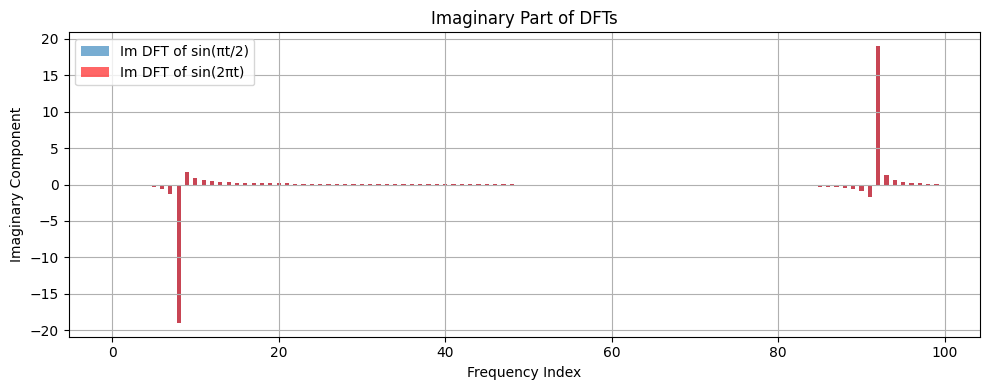

In [16]:
# Define the two signals
def signal1(t): return np.sin(np.pi * t / 2)
def signal2(t): return np.sin(2 * np.pi * t)

# Sampling parameters
t = np.linspace(0, 8, 100)  # Uniform sampling over [0, 8]

# Sample the signals
y1 = signal1(t)
y2 = signal2(t)

# Perform DFT
Y1 = DFT(y1,Ycomplex)
Y2 = DFT(y2,Ycomplex)

# Plot imaginary parts of the DFTs
plt.figure(figsize=(10, 4))
plt.bar(range(len(Y1)), [val.imag for val in Y1], width=0.5, label='Im DFT of sin(πt/2)', alpha=0.6)
plt.bar(range(len(Y2)), [val.imag for val in Y2], width=0.5, label='Im DFT of sin(2πt)', alpha=0.6, color='red')
plt.title("Imaginary Part of DFTs")
plt.xlabel("Frequency Index")
plt.ylabel("Imaginary Component")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

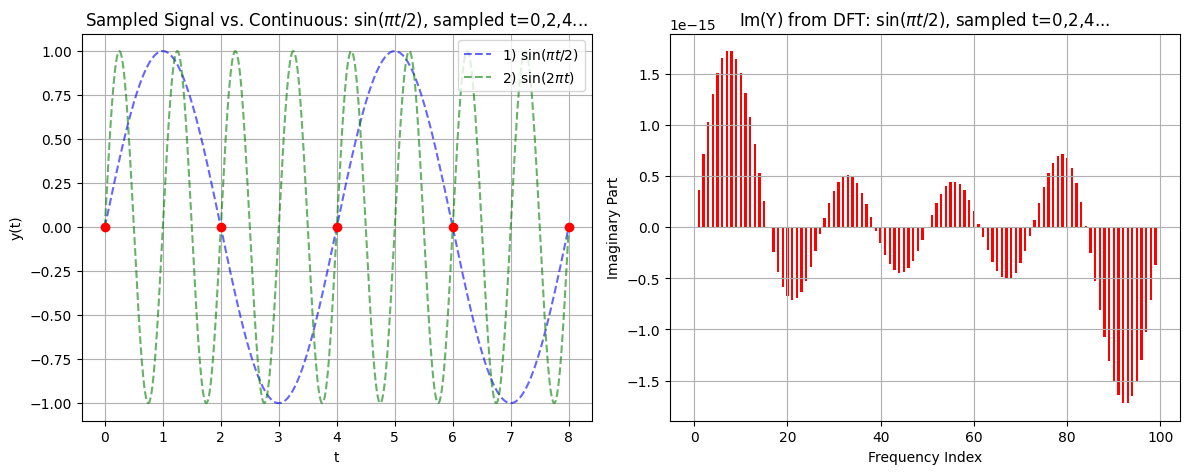

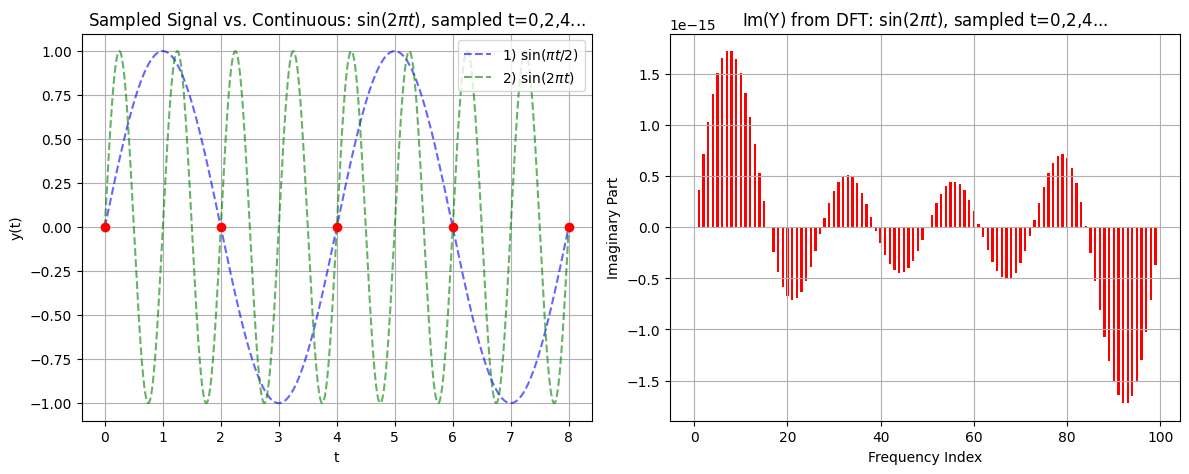

In [24]:
#(c) Sample at t = 0, 2, 4, 6, 8 
t_c = np.arange(0, 9, 2)  
# Evaluate
y1_c = signal1(t_c)
y2_c = signal2(t_c)

# Pad to N+1 to match DFT input size
y1_c_pad = np.zeros(N + 1)
y2_c_pad = np.zeros(N + 1)
y1_c_pad[:len(t_c)] = y1_c
y2_c_pad[:len(t_c)] = y2_c

# DFT
Y1_c = DFT(y1_c_pad, Ycomplex)
Y2_c = DFT(y2_c_pad, Ycomplex)

# Plot results
def plot_dft(t, y, Y, label):
    t_cont = np.linspace(0, 8, 1000) 
    y1_cont = signal1(t_cont)
    y2_cont = signal2(t_cont)

    plt.figure(figsize=(12, 5))

    # --- First subplot: Sampled vs. Continuous signals ---
    plt.subplot(1, 2, 1)
    plt.plot(t_cont, y1_cont, linestyle="dashed", color="blue", alpha=0.6, label=r'1) sin($\pi t / 2$)')
    plt.plot(t_cont, y2_cont, linestyle="dashed", color="green", alpha=0.6, label=r'2) sin($2\pi t$)')
    plt.stem(t, y, basefmt=" ", linefmt='r-', markerfmt='ro')
    plt.title(f"Sampled Signal vs. Continuous: {label}")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.legend(loc="upper right")
    plt.grid(True)

    # --- Second subplot: Imaginary part of DFT ---
    plt.subplot(1, 2, 2)
    plt.bar(range(len(Y)), [val.imag for val in Y], color='red', width=0.5)
    plt.title(f"Im(Y) from DFT: {label}")
    plt.xlabel("Frequency Index")
    plt.ylabel("Imaginary Part")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_dft(t_c, y1_c, Y1_c, r"$\sin(\pi t / 2)$, sampled t=0,2,4...")
plot_dft(t_c, y2_c, Y2_c, r"$\sin(2\pi t)$, sampled t=0,2,4...")

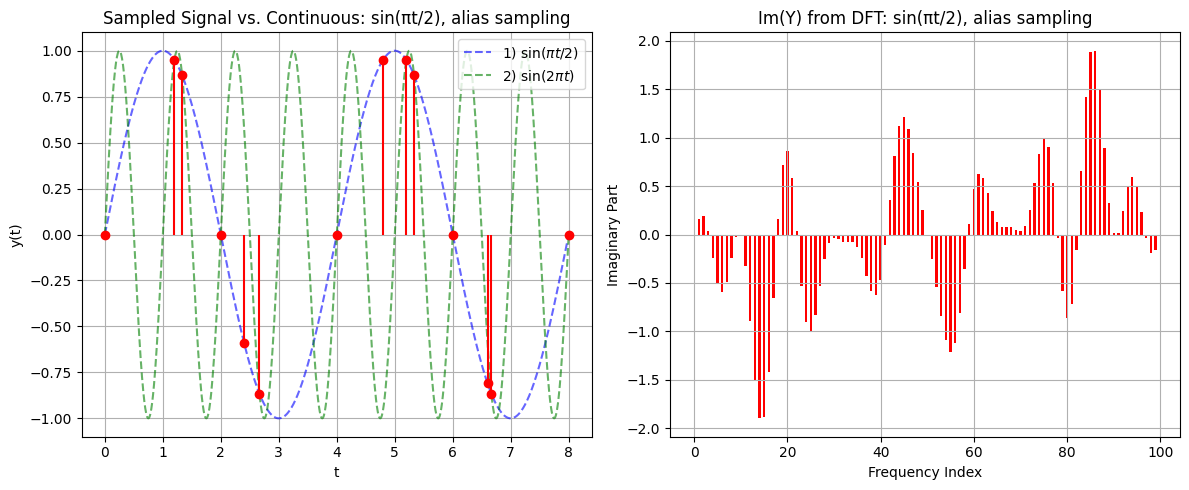

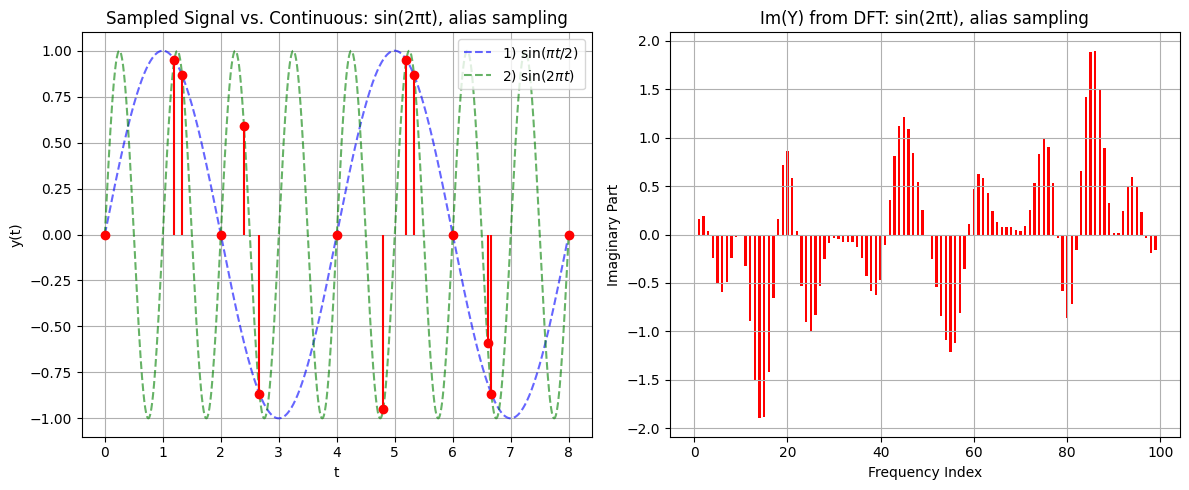

In [25]:
# (d) Sample at t = 0, 12/10, 4/3, ...,
t_d = np.array([
    0, 1.2, 4/3, 2, 2.4, 8/3, 4, 4.8, 
    5.2, 16/3, 6, 6.6, 20/3, 8
])
y1_d = signal1(t_d)
y2_d = signal2(t_d)

# Pad to N+1
y1_d_pad = np.zeros(N + 1)
y2_d_pad = np.zeros(N + 1)
y1_d_pad[:len(t_d)] = y1_d
y2_d_pad[:len(t_d)] = y2_d

Y1_d = DFT(y1_d_pad, Ycomplex)
Y2_d = DFT(y2_d_pad, Ycomplex)

plot_dft(t_d, y1_d, Y1_d, "sin(πt/2), alias sampling")
plot_dft(t_d, y2_d, Y2_d, "sin(2πt), alias sampling")

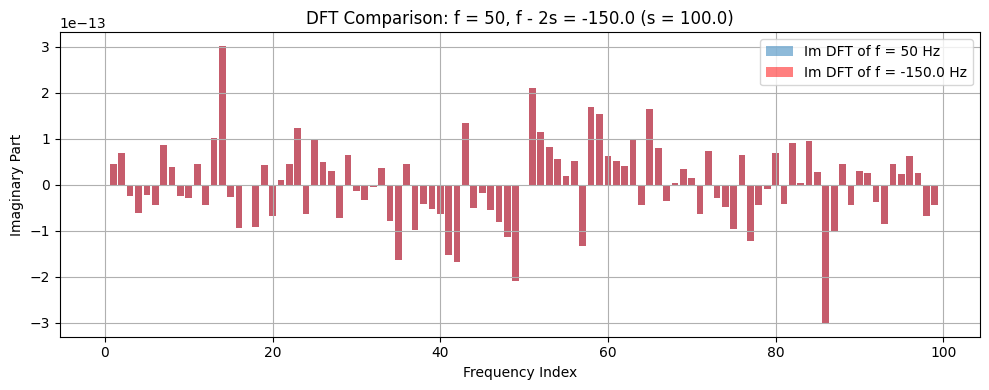

In [19]:
def nyquist_test(f_original, duration=1.0):
    s = N / duration  # Sample rate (samples per unit time)
    f_alias = f_original - 2 * s

    t = np.linspace(0, duration, N + 1)

    y_f = np.sin(2 * np.pi * f_original * t)
    y_alias = np.sin(2 * np.pi * f_alias * t)

    Y_f = DFT(y_f, Ycomplex)
    Y_alias = DFT(y_alias, Ycomplex)

    # Plot comparison
    plt.figure(figsize=(10, 4))
    plt.bar(range(N), [y.imag for y in Y_f], alpha=0.5, label=f"Im DFT of f = {f_original} Hz")
    plt.bar(range(N), [y.imag for y in Y_alias], alpha=0.5, label=f"Im DFT of f = {f_alias} Hz", color='red')
    plt.title(f"DFT Comparison: f = {f_original}, f - 2s = {f_alias} (s = {s})")
    plt.xlabel("Frequency Index")
    plt.ylabel("Imaginary Part")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

nyquist_test(f_original=50)


2) Perform a Fourier analysis of the chirp signal y(t) = sin(60t²). As seen in Figure 10.5,  
   this signal is not truly periodic, and is better analyzed with methods soon to be discussed.


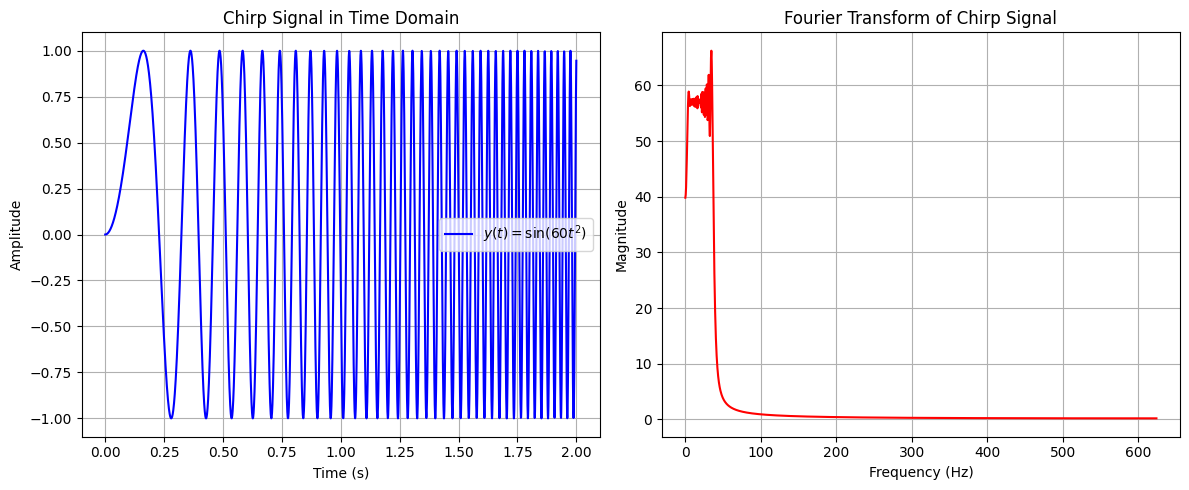

In [35]:
N = 2500
t = np.linspace(0, 2, N) 

Ycomplex = np.zeros(N, dtype=complex)

# Chirp Signal
def chirp_signal(t):
    return np.sin(60 * t**2)

# Compute Signal
y = chirp_signal(t)

# Compute DFT
Y = DFT(y,Ycomplex)

# Frequency Axis
freqs = np.fft.fftfreq(N, d=t[1] - t[0])

plt.figure(figsize=(12, 5))

# Time Domain
plt.subplot(1, 2, 1)
plt.plot(t, y, color='blue', label=r"$y(t) = \sin(60t^2)$")
plt.title("Chirp Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Frequency Domain
plt.subplot(1, 2, 2)
plt.plot(freqs[:N // 2], np.abs(Y[:N // 2]), color='red')
plt.title("Fourier Transform of Chirp Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()